In [105]:
import os
from chemicals.chemical import Chemical
from database.database import Database, LiquidMasterDataSet
from pprint import pprint, PrettyPrinter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pp = PrettyPrinter(width=80, compact=True)
%reload_ext autoreload
%autoreload 1
%aimport chemicals.chemical
%aimport database.database


In [106]:
db = Database(db="FMT")
df = db.pull(table="Liquid Master Table")

ds_lm = LiquidMasterDataSet(df)
ds_lm.map_names()
ds_lm.normalize_components(by="total_mass(g)", inplace=True)

In [107]:
df = ds_lm.dataframe

In [108]:
indices_batch_max = []
problematic_batches = []
for batch, indices in df.groupby("lab_batch").groups.items():
    index_batch_max = df.loc[indices, "LCE"].idxmax()
    if not np.isnan(index_batch_max):
        indices_batch_max.append(index_batch_max)
    else:
        problematic_batches.append(batch)
df_ = df.loc[indices_batch_max, ["lab_batch", "Electrolyte ID", "LCE"]]
    

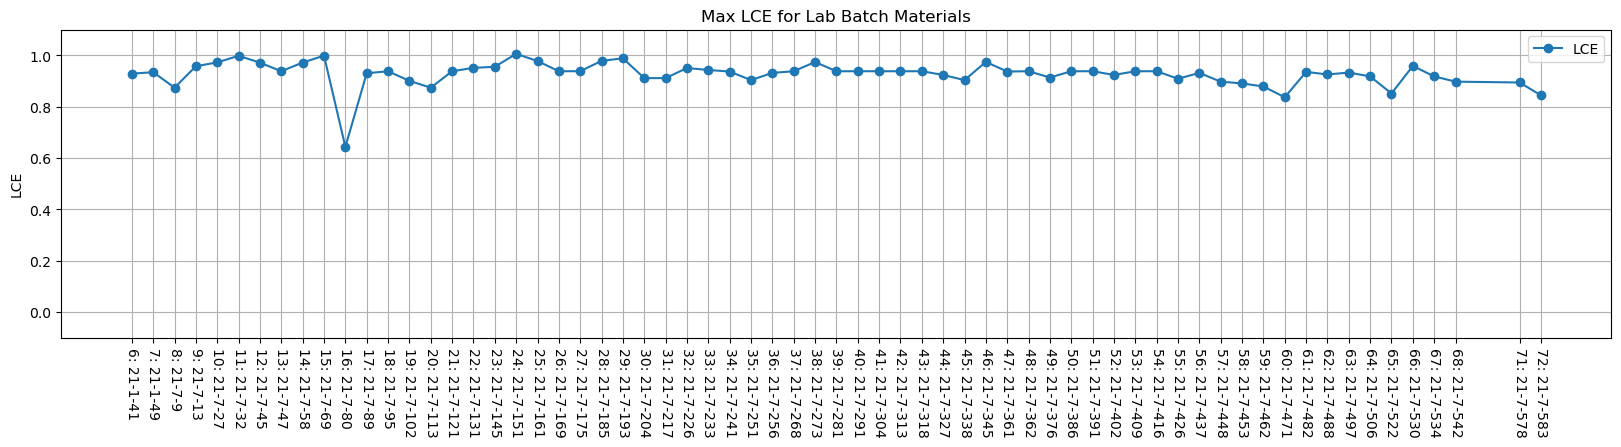

In [112]:
fig, ax = plt.subplots(figsize=(20,4))
df_.plot(x="lab_batch", y="LCE", marker="o", ax=ax)
ax.set_xticks(df_["lab_batch"])
ticks = list(map(lambda x: str(int(x[0])) + ": " + x[1], df_.loc[:, ["lab_batch","Electrolyte ID"]].to_numpy()))
ax.set_xticklabels(ticks, rotation=-90, ha="center", va="top")
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel("")
ax.set_title("Max LCE for Lab Batch Materials")
ax.set_ylabel("LCE")
ax.legend()
ax.grid(1)

In [114]:
df_ = ds_lm.dataframe.dropna(subset=["LCE", "Predicted LCE"])
df_["id"] = df["Electrolyte ID"].str.replace("-", "").astype(int)
df_ = df_.sort_values(axis="index", by="id")
df_ = df_.loc[:, ["Electrolyte ID", "LCE", "Predicted LCE"]].reset_index(drop=True)

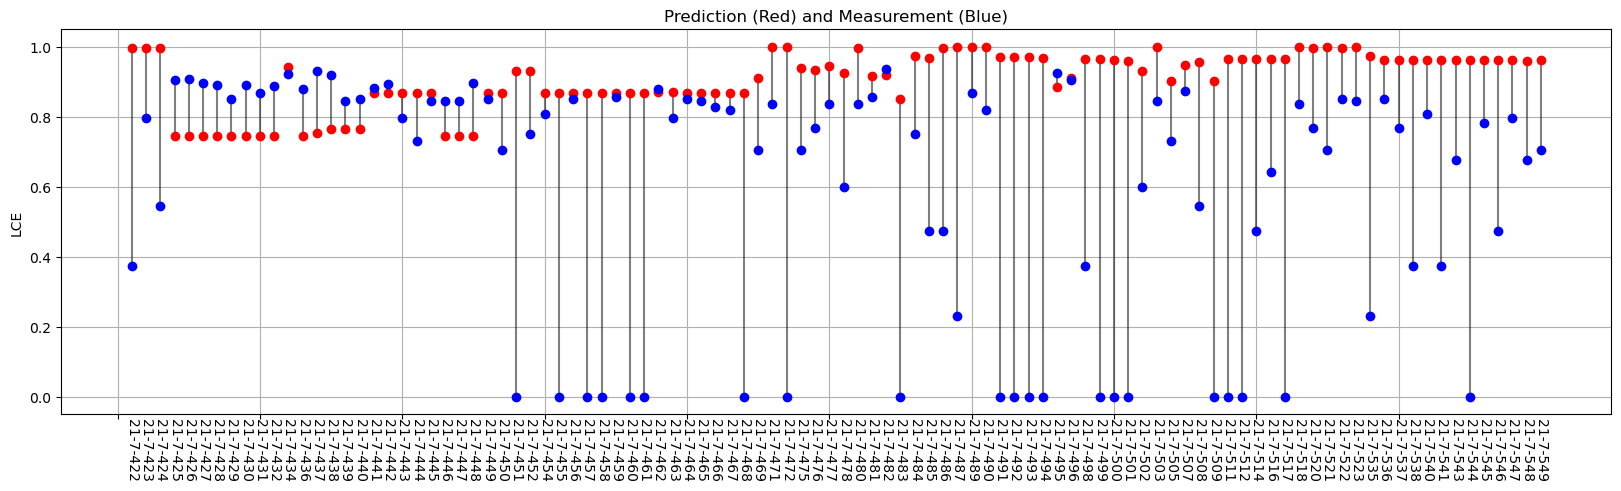

In [116]:
num_from_last = 100
fig, ax = plt.subplots(figsize=(20,5))
for row in df_.tail(num_from_last).iterrows():
    ax.plot([row[0]]*2, [row[1]["LCE"], row[1]["Predicted LCE"]], color="k", alpha=0.5)
    ax.plot(row[0], row[1]["Predicted LCE"], color="r", marker="o")
    ax.plot(row[0], row[1]["LCE"], color="b", marker="o")
    ax.text(row[0], -0.06, row[1]["Electrolyte ID"], rotation=-90, ha="center", va="top")
ax.set_xticks(np.arange(row[0]-num_from_last, row[0], 10))
ax.set_xticklabels([])
ax.set_title("Prediction (Red) and Measurement (Blue)")
ax.set_ylabel("LCE")
ax.grid(1, which="both", )
plt.show()

In [22]:
db = Database(db="bo_experiments")
df = db.pull(table="validated_lce_v1")

In [15]:
ds_lm = LiquidMasterDataSet(df)
ds_lm.map_names()
ds_lm.normalize_components(by="total_mass", inplace=True)

<AxesSubplot: xlabel='electrolyte_id'>

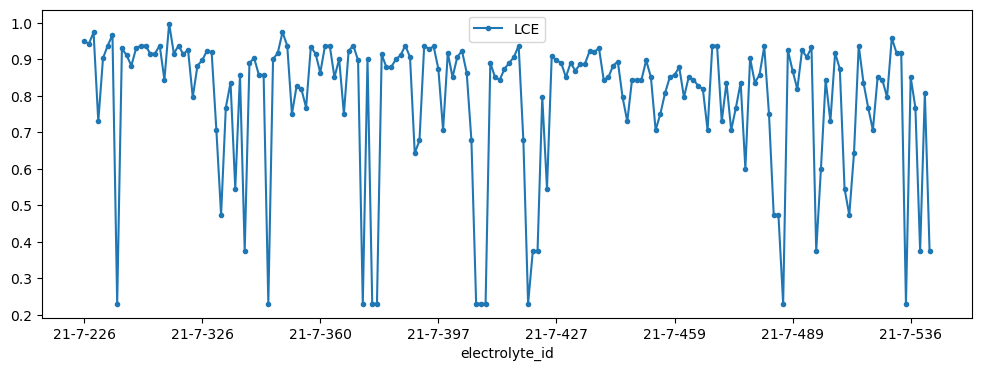

In [16]:
df_sort = ds_lm.dataframe.sort_values(axis="index", by="electrolyte_id")
df_sort.plot(x="electrolyte_id", y="LCE", ls="-", marker=".", figsize=(12,4))

In [19]:
df_sort.tail(7).loc[:, ["electrolyte_id","LCE"]]

,electrolyte_id,LCE
179,21-7-534,0.917355
173,21-7-535,0.230769
174,21-7-536,0.850746
175,21-7-537,0.767442
176,21-7-538,0.375000
177,21-7-540,0.807692
178,21-7-541,0.375000


In [ ]:
df_sort.tail(10)

,electrolyte_id,generation_method,total_mass,experiment,generation_project,DME,DOL,Al2O3,C1,C2,...,TTE,VC,TMSPi,P2O5,LiDFOB,TFEO,BTFEC,BTFE,AN,LCE
155,21-7-514,bo-so-val,1,cond_exp,DOE_electrolyte,0.00402,0.00510,0.0,0.0,0.0,...,0.0,0.00076,0.00247,0.0,0.0,0.0,0.0,0.0,0.0,0.473684
156,21-7-516,bo-so-val,1,cond_exp,DOE_electrolyte,0.00750,0.00531,0.0,0.0,0.0,...,0.0,0.00733,0.00419,0.0,0.0,0.0,0.0,0.0,0.0,0.642857
157,21-7-517,bo-so-val,1,cond_exp,DOE_electrolyte,0.00935,0.00839,0.0,0.0,0.0,...,0.0,0.00626,0.00420,0.0,0.0,0.0,0.0,0.0,0.0,0.937500
158,21-7-518,bo-so-val,1,no_sediment,DOE_electrolyte,0.00310,0.01038,0.0,0.0,0.0,...,0.0,0.00747,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.836066
159,21-7-520,bo-so-val,1,no_sediment,DOE_electrolyte,0.00783,0.01418,0.0,0.0,0.0,...,0.0,0.01348,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.767442
160,21-7-521,bo-so-val,1,no_sediment,DOE_electrolyte,0.01509,0.01515,0.0,0.0,0.0,...,0.0,0.00495,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.705882
161,21-7-522,bo-so-val,1,no_sediment,DOE_electrolyte,0.00337,0.01699,0.0,0.0,0.0,...,0.0,0.01363,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.850746
162,21-7-523,bo-so-val,1,no_sediment,DOE_electrolyte,0.00865,0.01375,0.0,0.0,0.0,...,0.0,0.00363,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.843750
163,21-7-528,literature,1,None,DOE_electrolyte,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.795918
164,21-7-530,manual,1,None,DOE_electrolyte,0.00000,0.00000,0.0,0.0,0.0,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.958083


In [3]:
df_cy = pd.read_csv("../chemicals/pnas.2214357120.sd01.csv")
df_cy.tail(5)

,FC,OC,FO,InOr,F,sF,aF,O,sO,aO,C,sC,aC,LCE (%),LLCE,Method,Current (mA/cm2),Capacity (mAh/cm2),Cycle,Reference
145,0.234,0.967,0.242,1.551,0.045,0.000,0.045,0.187,0.097,0.090,0.193,0.193,0.0,99.22,2.108,Cycle,0.5,1.0,500,19
146,0.219,0.281,0.781,0.632,0.077,0.046,0.031,0.098,0.037,0.061,0.350,0.350,0.0,99.30,2.155,Cycle,1.0,1.0,500,68
147,0.765,0.599,1.277,1.521,0.173,0.150,0.024,0.136,0.088,0.047,0.227,0.227,0.0,99.46,2.268,Cycle,0.5,1.0,500,19
148,0.208,0.915,0.227,1.434,0.041,0.000,0.041,0.182,0.099,0.082,0.198,0.198,0.0,99.10,2.046,Cycle,0.2,1.0,>500,18
149,0.191,0.750,0.255,0.973,0.055,0.000,0.055,0.214,0.214,0.000,0.285,0.285,0.0,85.00,0.824,Cycle,1.0,1.0,NaN,35


In [11]:
df_sel.columns

Index(['FC', 'OC', 'FO', 'InOr', 'F', 'sF', 'aF', 'O', 'sO', 'aO', 'C', 'sC',
       'aC', 'LCE (%)', 'LLCE', 'Method', 'Current (mA/cm2)',
       'Capacity (mAh/cm2)', 'Cycle', 'Reference'],
      dtype='object')

In [12]:
df_sel = df_cy.loc[df_cy["Method"] == "Aurbach"]
features = df_sel.loc[:, ['FC', 'OC', 'FO', 'InOr', 'F', 'sF', 'aF', 'O', 'sO', 'aO', 'C', 'sC', 'aC']]
targets = df_sel.loc[:, ["LLCE"]]

In [23]:
df_cy["Cycle"] = pd.to_numeric(df_cy["Cycle"], errors="coerce")

<AxesSubplot: xlabel='Cycle'>

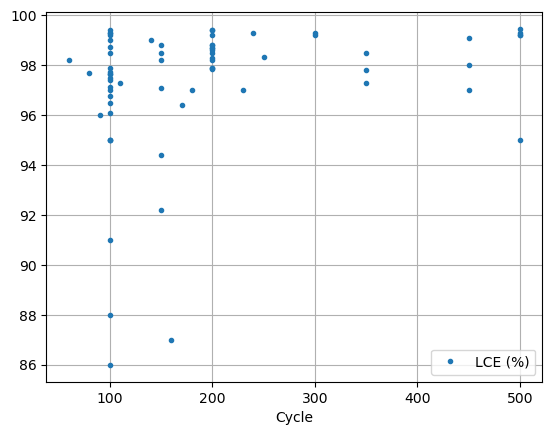

In [33]:
df_cy.loc[(df_cy["Cycle"]>50), ["Cycle", "LCE (%)"]].plot(x="Cycle", y="LCE (%)", marker=".", ls="", grid=True)